In [2]:
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
import seaborn as sns
from matplotlib.style import reload_library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from machine_learning.config import EXTERNAL_DATA_DIR, MPLSTYLE_DIR

2025-02-23 13:36:30.174 | INFO     | machine_learning.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\machine-learning


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [4]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [8]:
X['target'] = y

C:\Users\Andrei\AppData\Local\Temp\ipykernel_30104\1134382902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['target'] = y


<Axes: >

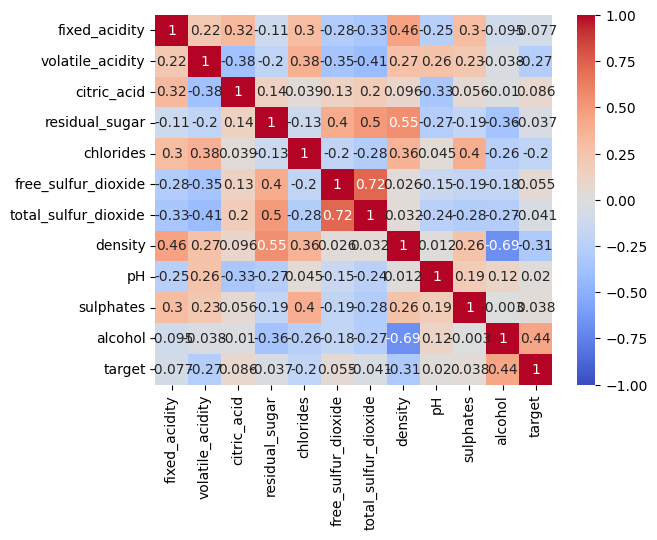

In [11]:
sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

In [5]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [14]:
from machine_learning.modeling import pipepline
import warnings
warnings.filterwarnings('ignore')
reload_library()
plt.style.use(MPLSTYLE_DIR / "iragca_ml.mplstyle")

2025-02-23 13:42:27.160 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Wine Quality. n_neighbors: range(1, 20), trials: 10


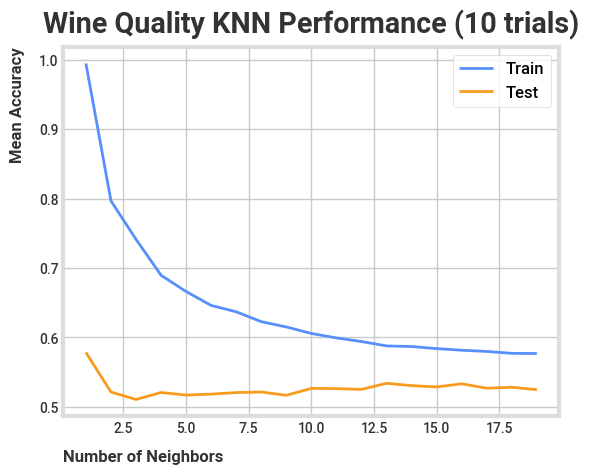

2025-02-23 13:43:19.766 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Wine Quality
 Train max accuracy: 0.9947660098522167
 Test max accuracy: 0.5784


In [17]:
X, y = wine_quality['data']['features'][['volatile_acidity', 'alcohol', 'density']], wine_quality['data']['targets']

sp_knn = pipepline.KNNPipeline(X, y, "Wine Quality")

sp_knn_results = sp_knn.grid_search(range(1, 20), trials=10, plot=True, test_size=0.25, metric="manhattan")

2025-02-23 13:43:19.774 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Wine Quality. n_neighbors: range(1, 20), trials: 10


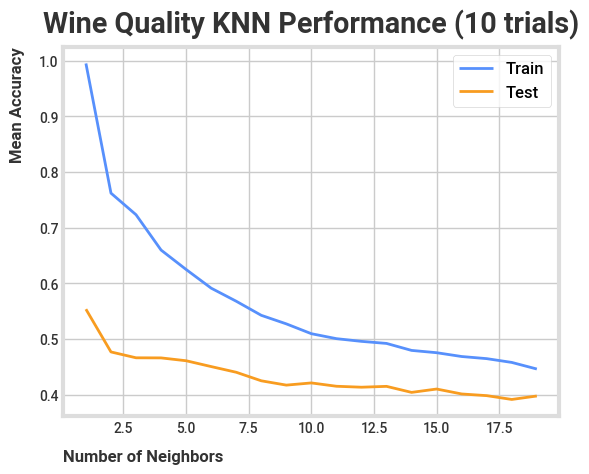

2025-02-23 13:45:39.146 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Wine Quality
 Train max accuracy: 0.9948891625615763
 Test max accuracy: 0.5537846153846153


In [18]:
sp_knn = pipepline.KNNPipeline(X, y, "Wine Quality")

sp_knn_results = sp_knn.grid_search(range(1, 20), trials=10, plot=True, test_size=0.25, metric="hamming")

2025-02-23 13:45:39.155 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Wine Quality. n_neighbors: range(1, 20), trials: 10


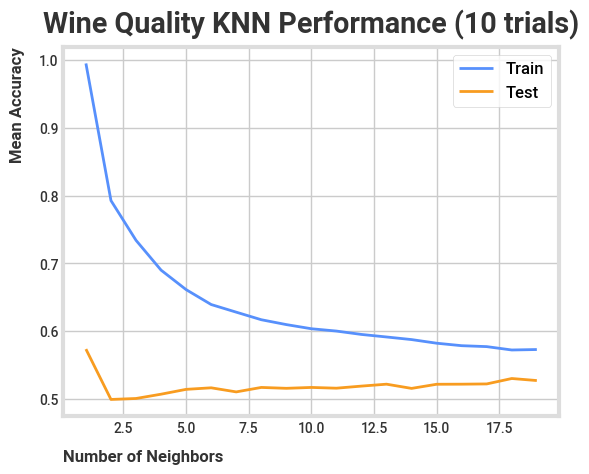

2025-02-23 13:47:40.353 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Wine Quality
 Train max accuracy: 0.9949302134646963
 Test max accuracy: 0.5735384615384616


In [19]:
sp_knn = pipepline.KNNPipeline(X, y, "Wine Quality")

sp_knn_results = sp_knn.grid_search(range(1, 20), trials=10, plot=True, test_size=0.25, metric="cosine")